

# **La Condition Humaine, 1935 by Rene Magritte**



![Human condition](https://raw.githubusercontent.com/asyaf/magritte/master/images/human_condition.jpg)

# Setup

In [0]:
import cv2
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!git clone https://github.com/asyaf/magritte.git
os.chdir("/content/magritte/code")

ROOT_DIR = os.path.abspath("..")

from utils import load_image, alpha_blend, display_image, \
    display_images, resize_image, mask_to_gray, trim_image, \
    paste_image_with_offset, display_image, paste_on_locations, \
    extract_alpha, single_channel_to_gray

Cloning into 'magritte'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 125 (delta 32), reused 23 (delta 4), pack-reused 0
Receiving objects: 100% (125/125), 33.36 MiB | 31.43 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [0]:
IMG_PATH = os.path.join(ROOT_DIR, "images")
CAVE_IMG = "cave.jpg"
CAVE_IMG_PATH = os.path.join(IMG_PATH, CAVE_IMG)
FIRE_IMG = "fire.png"
FIRE_IMG_PATH = os.path.join(IMG_PATH, FIRE_IMG)
EASEL_IMG = "easel.png"
EASEL_IMG_PATH = os.path.join(IMG_PATH, EASEL_IMG)
CASTLE_IMG = "castle.jpg"
CASTLE_IMG_PATH = os.path.join(IMG_PATH, CASTLE_IMG)

# Load cave image

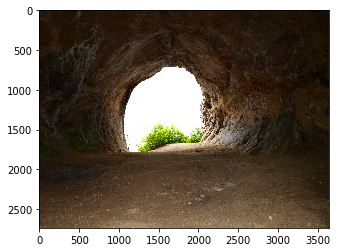

In [4]:
cave_img = load_image(CAVE_IMG_PATH)
display_image(cave_img)

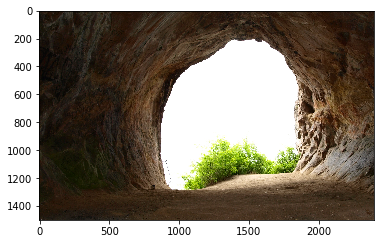

In [5]:
min_x = 200
max_x = 2600
min_y = 500
max_y = 2000 
trimmed_cave_img = trim_image(cave_img, min_x, max_x, min_y, max_y)
display_image(trimmed_cave_img)

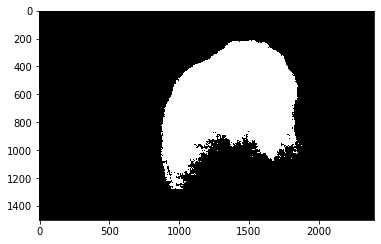

In [6]:
cave_gray = cv2.cvtColor(trimmed_cave_img, cv2.COLOR_RGB2GRAY)
_, cave_thresh = cv2.threshold(cave_gray, 254, 255, cv2.THRESH_BINARY)
display_image(cave_thresh)

# Add fire

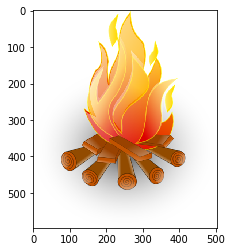

In [7]:
fire_img = load_image(FIRE_IMG_PATH, use_alpha=True)
display_image(fire_img)

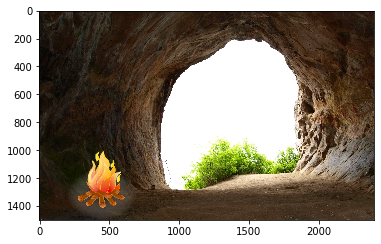

In [8]:
new_top = 1000
new_right = 700
new_bottom = 1500
new_left = 200
new_location = [new_top, new_right, new_bottom, new_left]
cave_with_fire_img = paste_on_locations(trimmed_cave_img, fire_img, 
                                        [new_location])
display_image(cave_with_fire_img)

# Handle easel

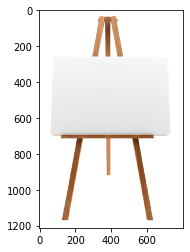

In [9]:
easel_img = load_image(EASEL_IMG_PATH, use_alpha=True)
display_image(easel_img)

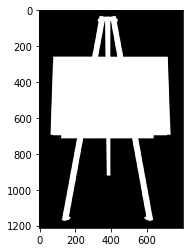

In [10]:
easel_mask = extract_alpha(easel_img)
display_image(easel_mask)

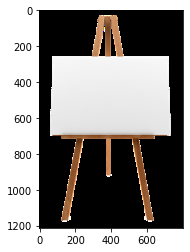

In [11]:
easel_rgb = easel_img[:,:,0:3]
display_image(easel_rgb)

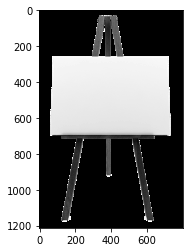

In [12]:
easel_1ch = easel_img[:,:,2]
display_image(easel_1ch)

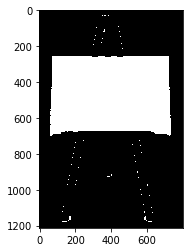

In [13]:
_, easel_board_thresh = cv2.threshold(easel_1ch, 220, 255, cv2.THRESH_BINARY)
display_image(easel_board_thresh)

# Handle castle

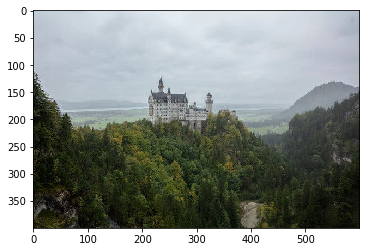

In [14]:
castle_img = load_image(CASTLE_IMG_PATH)
display_image(castle_img)

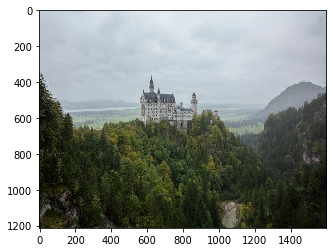

In [15]:
easel_h, easel_w = easel_board_thresh.shape
castle_h, castle_w, _ = castle_img.shape
new_castle_w = max(easel_w*2, castle_w)
new_castle_h = max(easel_h, castle_h)
resized_castle_img = resize_image(castle_img, new_castle_w, new_castle_h)
display_image(resized_castle_img)

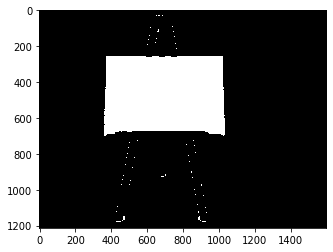

In [16]:
black_img_castle_shape = np.zeros((new_castle_h, new_castle_w, 3), 
                                  dtype=np.uint8)
easel_pos_x = 300
easel_pos_y = 0
easel_board_thresh_img = single_channel_to_gray(easel_board_thresh)
pasted_easel_thresh = paste_image_with_offset(black_img_castle_shape, 
                                              easel_board_thresh_img, 
                                              easel_pos_x, easel_pos_y)
display_image(pasted_easel_thresh)

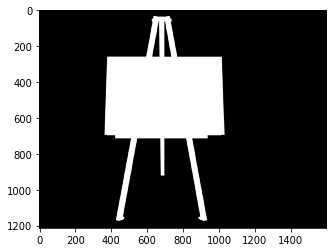

In [17]:
easel_mask_img = single_channel_to_gray(easel_mask)
pasted_easel_mask = paste_image_with_offset(black_img_castle_shape, 
                                            easel_mask_img, 
                                            easel_pos_x, easel_pos_y)
display_image(pasted_easel_mask)

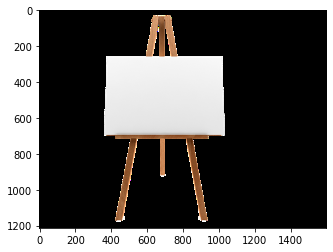

In [18]:
pasted_easel_img = paste_image_with_offset(black_img_castle_shape, easel_rgb, 
                                           easel_pos_x, easel_pos_y)
display_image(pasted_easel_img)

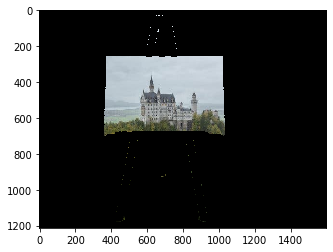

In [19]:
castle_through_easel_img = cv2.copyTo(resized_castle_img, pasted_easel_thresh)
display_image(castle_through_easel_img)

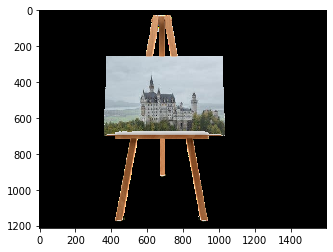

In [20]:
easel_with_castle_img = alpha_blend(castle_through_easel_img, 
                                    pasted_easel_img, pasted_easel_thresh)
easel_with_castle_img = easel_with_castle_img.astype(np.uint8)
display_image(easel_with_castle_img)

# Add view from cave

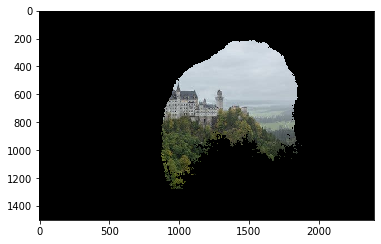

In [21]:
cave_h, cave_w = cave_thresh.shape
resized_castle_to_cave_img = resize_image(castle_img, cave_w, cave_h)
cave_view_img = cv2.copyTo(resized_castle_to_cave_img, cave_thresh)
display_image(cave_view_img)

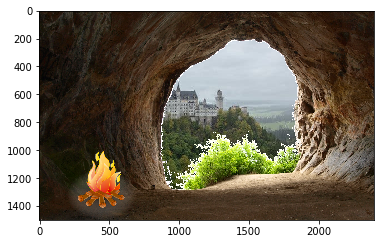

In [22]:
cave_thresh_img = single_channel_to_gray(cave_thresh)
cave_view_fire_img = alpha_blend(cave_view_img, cave_with_fire_img,
                                 cave_thresh_img)
cave_view_fire_img = cave_view_fire_img.astype(np.uint8)
display_image(cave_view_fire_img)

# Paste easel in the cave

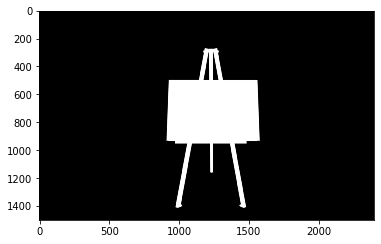

In [23]:
black_img_cave_shape = np.zeros((cave_h, cave_w, 3), dtype=np.uint8)
easel_board_mask_img = single_channel_to_gray(easel_mask)
easel_pos_in_cave_x = 550
easel_pos_in_cave_y = 240
pasted_easel_mask_on_cave = paste_image_with_offset(black_img_cave_shape, 
                                            pasted_easel_mask, 
                                            easel_pos_in_cave_x, 
                                            easel_pos_in_cave_y)
display_image(pasted_easel_mask_on_cave)

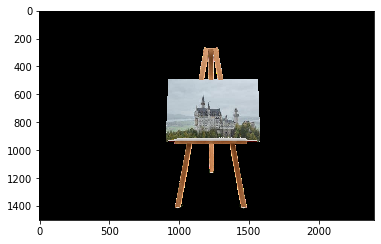

In [24]:
pasted_easel_with_castle_img = paste_image_with_offset(black_img_cave_shape, 
                                                       easel_with_castle_img, 
                                                       easel_pos_in_cave_x, 
                                                       easel_pos_in_cave_y)
display_image(pasted_easel_with_castle_img)

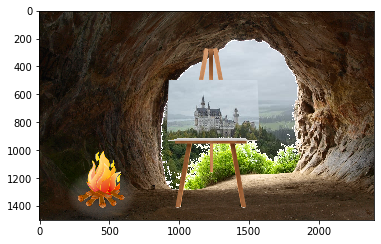

In [25]:
easel_with_cave_and_fire = alpha_blend(pasted_easel_with_castle_img,
                                       cave_view_fire_img,
                                       pasted_easel_mask_on_cave)
easel_with_cave_and_fire = easel_with_cave_and_fire.astype(np.uint8)
display_image(easel_with_cave_and_fire)